In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import logging


INFO:root:1
INFO:root:5
INFO:root:4
INFO:root:5


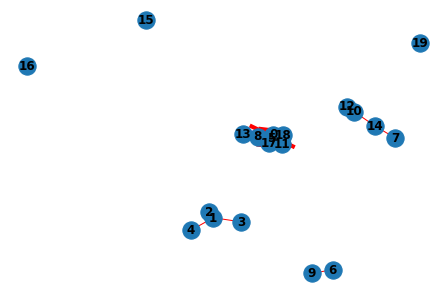

In [74]:
logging.basicConfig(level=logging.INFO)

logging.info('1')

G = nx.Graph()

nodes = [i for i in range(20)]


G.add_nodes_from(nodes)
G.add_edges_from([(1, 2, {'fc':True, 'weight': 10}), (1, 3), (4,1)])

G.add_edges_from([(11, 5, {'fc':True, 'weight': 10}), (5, 8, {'weight': 20}),
                  (5,0, {'weight': 50}),
                  (5,17, {'weight': 20}),
                  (18,17),
                  (5,18, {'weight': 10}),
                  (0,18, {'weight': 5}),
                  (8,13, {'fc':True, 'weight': 10})])

G.add_edges_from([(12, 10, {'fc':True, 'weight': 10}), (10, 14), (7,14), (6,9)])

logging.info('5')
#nx.draw_networkx_nodes(G, node_size=10, node_color='r')
logging.info('4')

edges = G.edges()

colors=[]
weights=[]
for u,v in edges:
    color='r'
    weight = 1
    if 'fc' in G[u][v]:
        if G[u][v]['fc']:
            color='b'
    if 'weight' in G[u][v]:
        if G[u][v]['weight']:
            weight=G[u][v]['weight']
    colors.append(color)
    weights.append(weight)
            
    

nx.draw(G, with_labels=True, font_weight='bold', edge_color=colors, width=weights)
#nx.draw_networkx_edges(G,  edge_color='b')
logging.info('5')

plt.show()

In [75]:
components = list(nx.connected_components(G))
print(components)

[{0, 5, 8, 11, 13, 17, 18}, {1, 2, 3, 4}, {9, 6}, {10, 12, 14, 7}, {15}, {16}, {19}]


[600, 200, 200, 200]
1 2
!
1 3
1 4
{(1, 2): 10}
[(1, 2)]


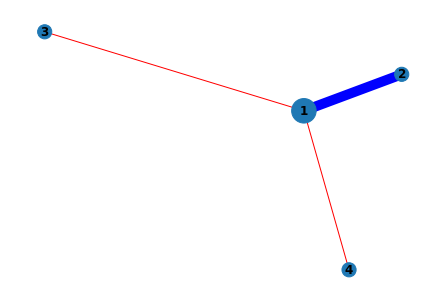

In [87]:
H = G.subgraph(components[1])

deg = nx.degree(H)
sizes = [200 * deg[i] for i in H.nodes]
print(sizes)

edges = H.edges()
colors=[]
weights=[]
pairs=[]
for u,v in edges:
    print(u,v)
    color='r'
    weight = 1
    if 'fc' in G[u][v]:
        print('!')
        pairs.append((u, v))
        if G[u][v]['fc']:
            color='b'
    if 'weight' in G[u][v]:
        if G[u][v]['weight']:
            weight=G[u][v]['weight']
    colors.append(color)
    weights.append(weight)
    
labels = nx.get_edge_attributes(H, 'weight')
print(labels)
print(pairs)
nx.draw(H, with_labels=True, font_weight='bold', edge_color=colors, width=weights, node_size=sizes)
#nx.draw_networkx_edges(G,  edge_color='b')

plt.show()

In [88]:
from itertools import combinations
combos=list(combinations(pairs, 2))
print(combos)
path=[]
for pair in combos:
    path=nx.shortest_path(H, source=pair[0][0], target=pair[1][0], weight='weight')
    path.append(pair[0][1])
    path.append(pair[1][1])
    print(path)

[]


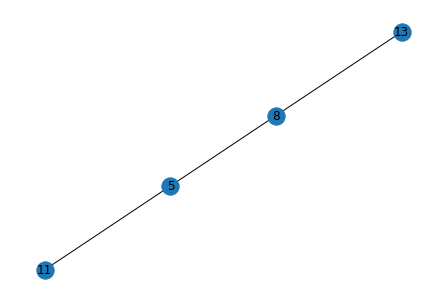

In [90]:
H1 = G.subgraph(path)
nx.draw(H1, with_labels=True)